In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
from imblearn.over_sampling import RandomOverSampler

# Importing Dataset

In [3]:
df = pd.read_csv("E:\magic04.data")
df.columns = ["fLength","fWidth","fSize","fConc","fConcl","fAsym","fM3Long","fM3Trans",
              "fAlpha","fDist","Class"]
df

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [4]:
df['Class'].unique()

array(['g', 'h'], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Class'] = labelencoder.fit_transform(df['Class'])
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,0
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,0
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,0
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,0
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,0


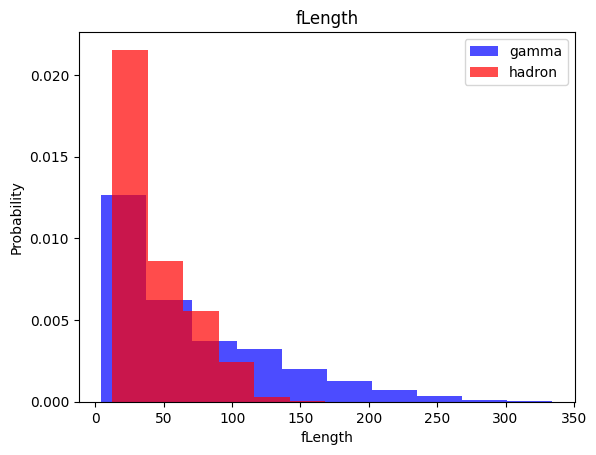

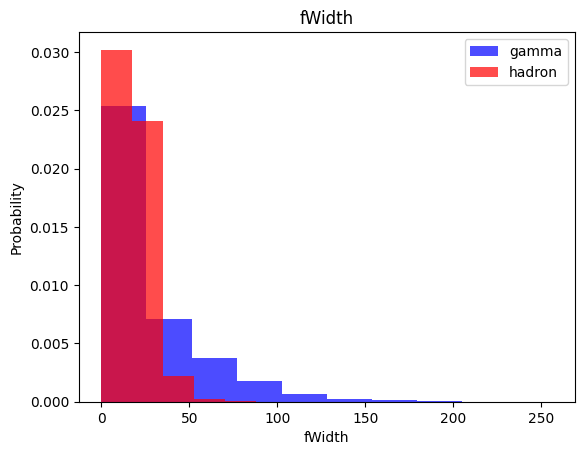

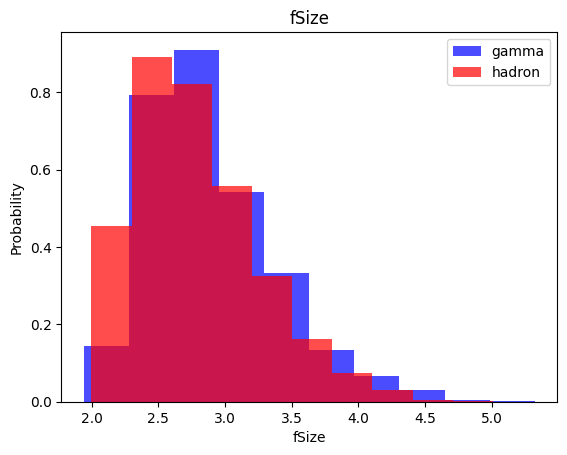

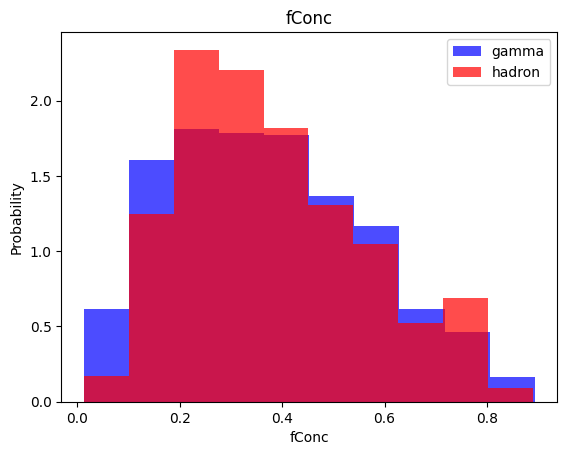

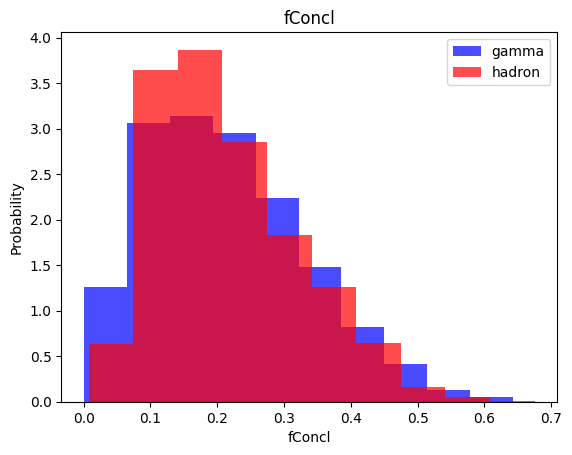

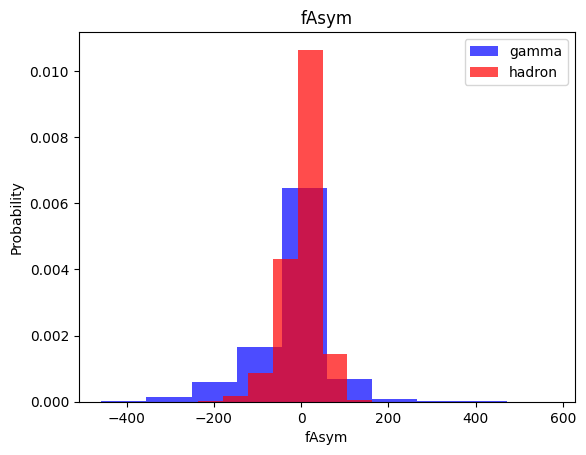

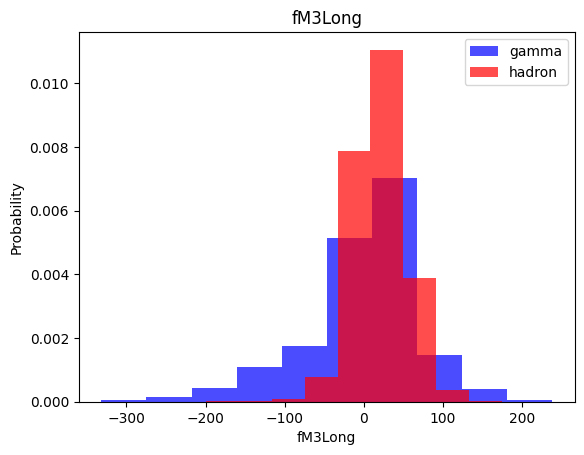

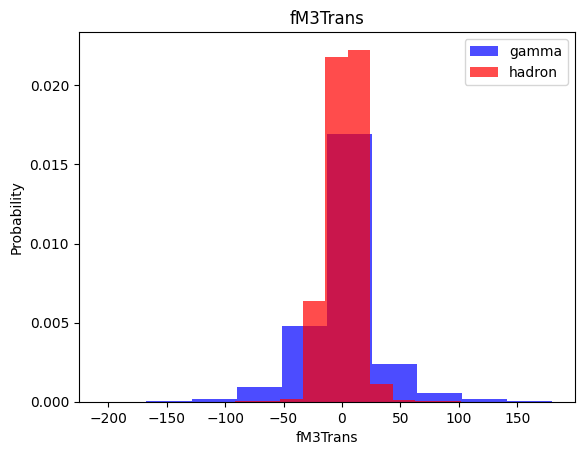

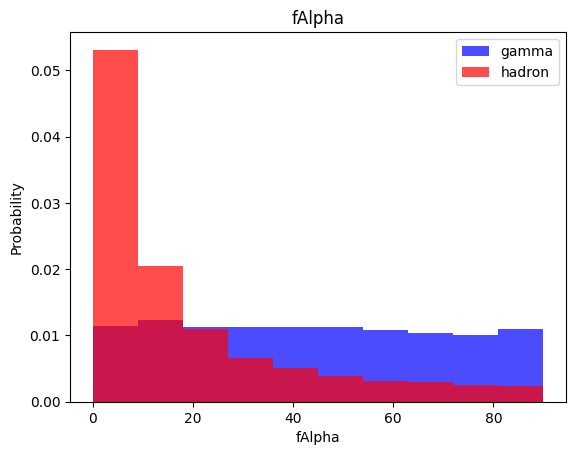

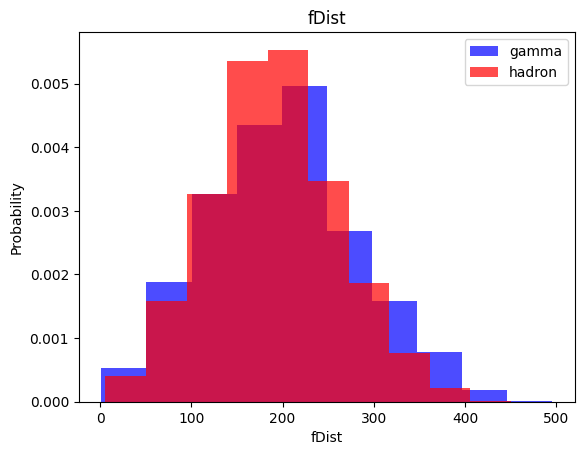

In [6]:
for label in df.columns[:-1]:
    plt.hist(df[df['Class']==1][label],color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df['Class']==0][label],color='red',label='hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Probability") # coz we are taking density of the columns
    plt.legend()
    plt.show()

# Train,Validation and Test datasets

In [7]:
train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [8]:
def scale_dataset(dataframe,oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    if oversample:
        ros = RandomOverSampler()
        x,y = ros.fit_resample(x,y)

    scaler = StandardScaler()
    x = scaler.fit_transform(x)
# hstack is used to stack the array horizontally(i.e. side by side)
    data = np.hstack((x, np.reshape(y,(-1,1))))
    return data,x,y

In [9]:
df

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,0
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,1
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,1
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,1
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,1


validation and test datasets are for the purpose of testing the model on unseen data,for that we don't need to oversample,we need to keep it raw

In [10]:
train,X_train,y_train = scale_dataset(train,oversample=True)
valid,X_valid,y_valid = scale_dataset(valid,oversample=False)
test,X_test,y_test = scale_dataset(test,oversample=False)

oversampling is used for imbalanced datasets where the frequency of one class is greater than the other so we try to uniformly distribute the classes

In [11]:
sum(y_train==1)

7374

In [12]:
sum(y_train==0)

7374

# kNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn_model.predict(X_test)

In [16]:
y_pred

array([0, 0, 0, ..., 1, 1, 0])

In [17]:
y_test

array([1, 0, 0, ..., 1, 1, 1])

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      2495
           1       0.70      0.77      0.74      1309

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.79      3804
weighted avg       0.82      0.81      0.81      3804



# Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [21]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79      2495
           1       0.60      0.47      0.52      1309

    accuracy                           0.71      3804
   macro avg       0.67      0.65      0.66      3804
weighted avg       0.70      0.71      0.70      3804



# SVM

In [22]:
from sklearn.svm import SVC
#support vactor classifier

In [23]:
svm_model = SVC()
svm_model.fit(X_train,y_train)

SVC()

In [24]:
y_pred = svm_model.predict(X_test)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      2495
           1       0.73      0.83      0.78      1309

    accuracy                           0.83      3804
   macro avg       0.82      0.83      0.82      3804
weighted avg       0.84      0.83      0.84      3804



# Neural Networks
Without activation function ,it becomes a linear model  
epochs means number of trained cycles  
TensorFlow keeps track of the history of training as well

In [26]:
# pip install --upgrade tensorflow

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [57]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import Sequential

In [53]:
def plot_loss(history):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary CrossEntropy')
    plt.legend()
    plt.grid(True)
    plt.show()
def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label='accuracy')
    plt.plot(history.history['val_accuracy'],label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    

Dropout prevents overfitting,randomnly chooses data.  
verbose=0 is passed to not print anything

In [60]:
def trained_model(x_train,y_train,num_nodes,dropout_prob,learning_rate,epochs,batch_size):
    nn_model = Sequential([
        Dense(num_nodes,activation='relu'),
        Dropout(dropout_prob),
        Dense(num_nodes,activation='relu'),
        Dropout(dropout_prob),
        Dense(1,activation='sigmoid')
    ])
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='binary_crossentropy',
                 metrics=['accuracy'])
    history = nn_model.fit(X_train,y_train,epochs=100,batch_size=32,
                           validation_split=0.20,verbose=0)
    return nn_model,history

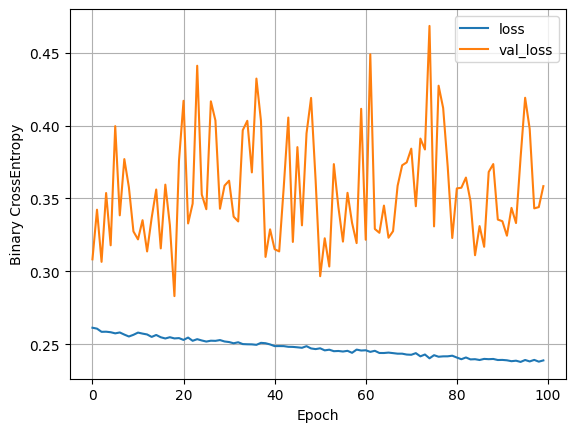

In [54]:
plot_loss(history)

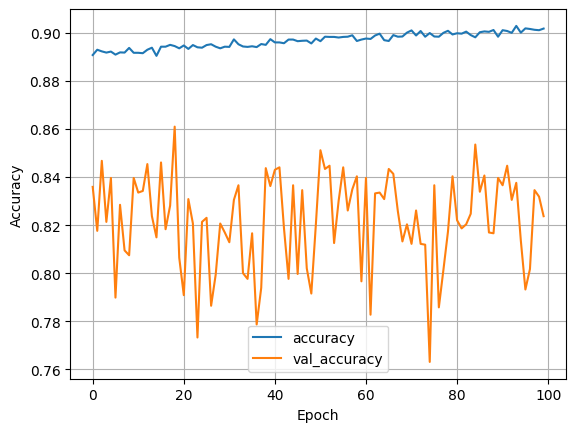

In [55]:
plot_accuracy(history)

In [46]:
nn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,325 (16.90 KB)

 Trainable params: 1,441 (5.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,884 (11.27 KB)